In [2]:
from tools.video_tools import Editor
from matplotlib import pyplot as plt
file_name = "test/samples/sample_episode.mp4"
editor = Editor(file_path=file_name)

[[[38 38 38]
  [41 41 41]
  [54 54 54]
  ...
  [18 18 18]
  [16 16 16]
  [14 14 14]]

 [[35 35 35]
  [49 49 49]
  [59 59 59]
  ...
  [18 18 18]
  [16 16 16]
  [14 14 14]]

 [[28 28 28]
  [42 42 42]
  [44 44 44]
  ...
  [18 18 18]
  [16 16 16]
  [14 14 14]]

 ...

 [[44 44 44]
  [69 69 69]
  [52 52 52]
  ...
  [36 36 36]
  [44 44 44]
  [31 31 31]]

 [[43 43 43]
  [55 55 55]
  [42 42 42]
  ...
  [42 42 42]
  [48 48 48]
  [35 35 35]]

 [[43 43 43]
  [49 49 49]
  [37 37 37]
  ...
  [45 45 45]
  [50 50 50]
  [36 36 36]]]


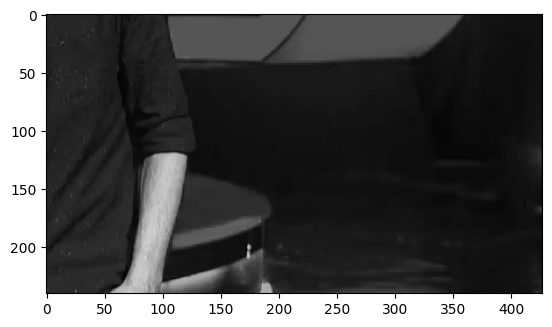

[[[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [18 18 18]
  [16 16 16]
  [14 14 14]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [18 18 18]
  [16 16 16]
  [14 14 14]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [18 18 18]
  [16 16 16]
  [14 14 14]]

 ...

 [[44 44 44]
  [45 45 45]
  [45 45 45]
  ...
  [26 26 26]
  [26 26 26]
  [20 20 20]]

 [[44 44 44]
  [46 46 46]
  [46 46 46]
  ...
  [24 24 24]
  [23 23 23]
  [21 21 21]]

 [[44 44 44]
  [46 46 46]
  [46 46 46]
  ...
  [23 23 23]
  [22 22 22]
  [20 20 20]]]


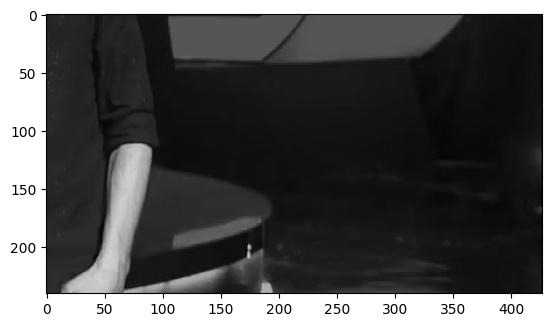

[[[37 37 37]
  [36 36 36]
  [36 36 36]
  ...
  [18 18 18]
  [17 17 17]
  [14 14 14]]

 [[37 37 37]
  [35 35 35]
  [35 35 35]
  ...
  [18 18 18]
  [17 17 17]
  [15 15 15]]

 [[37 37 37]
  [35 35 35]
  [34 34 34]
  ...
  [18 18 18]
  [17 17 17]
  [14 14 14]]

 ...

 [[43 43 43]
  [42 42 42]
  [43 43 43]
  ...
  [22 22 22]
  [22 22 22]
  [15 15 15]]

 [[43 43 43]
  [42 42 42]
  [43 43 43]
  ...
  [22 22 22]
  [22 22 22]
  [15 15 15]]

 [[43 43 43]
  [42 42 42]
  [43 43 43]
  ...
  [22 22 22]
  [22 22 22]
  [15 15 15]]]


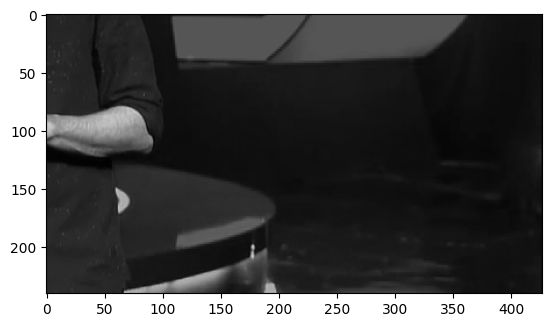

[[[35 35 35]
  [35 35 35]
  [36 36 36]
  ...
  [18 18 18]
  [15 15 15]
  [13 13 13]]

 [[35 35 35]
  [35 35 35]
  [36 36 36]
  ...
  [18 18 18]
  [15 15 15]
  [13 13 13]]

 [[35 35 35]
  [35 35 35]
  [36 36 36]
  ...
  [18 18 18]
  [15 15 15]
  [12 12 12]]

 ...

 [[43 43 43]
  [44 44 44]
  [44 44 44]
  ...
  [20 20 20]
  [18 18 18]
  [11 11 11]]

 [[43 43 43]
  [44 44 44]
  [44 44 44]
  ...
  [20 20 20]
  [20 20 20]
  [13 13 13]]

 [[43 43 43]
  [44 44 44]
  [44 44 44]
  ...
  [20 20 20]
  [20 20 20]
  [13 13 13]]]


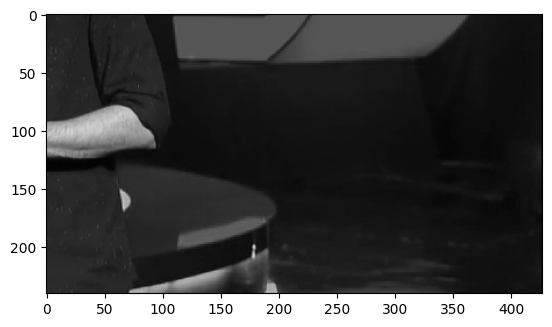

[[[33 33 33]
  [35 35 35]
  [38 38 38]
  ...
  [18 18 18]
  [17 17 17]
  [15 15 15]]

 [[31 31 31]
  [38 38 38]
  [40 40 40]
  ...
  [18 18 18]
  [17 17 17]
  [15 15 15]]

 [[34 34 34]
  [41 41 41]
  [44 44 44]
  ...
  [17 17 17]
  [16 16 16]
  [14 14 14]]

 ...

 [[43 43 43]
  [42 42 42]
  [42 42 42]
  ...
  [19 19 19]
  [19 19 19]
  [12 12 12]]

 [[43 43 43]
  [42 42 42]
  [42 42 42]
  ...
  [20 20 20]
  [20 20 20]
  [15 15 15]]

 [[43 43 43]
  [42 42 42]
  [42 42 42]
  ...
  [22 22 22]
  [22 22 22]
  [15 15 15]]]


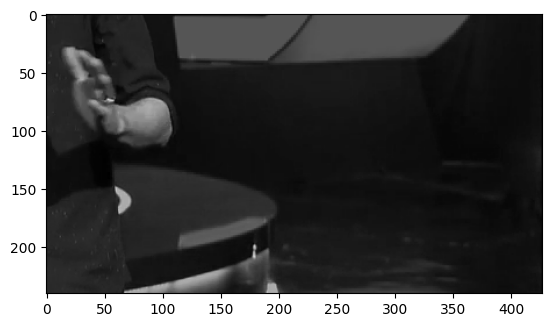

[[[35 35 35]
  [36 36 36]
  [36 36 36]
  ...
  [16 16 16]
  [16 16 16]
  [10 10 10]]

 [[38 38 38]
  [37 37 37]
  [36 36 36]
  ...
  [16 16 16]
  [15 15 15]
  [10 10 10]]

 [[42 42 42]
  [40 40 40]
  [36 36 36]
  ...
  [16 16 16]
  [15 15 15]
  [10 10 10]]

 ...

 [[44 44 44]
  [43 43 43]
  [43 43 43]
  ...
  [20 20 20]
  [20 20 20]
  [12 12 12]]

 [[45 45 45]
  [43 43 43]
  [44 44 44]
  ...
  [21 21 21]
  [21 21 21]
  [15 15 15]]

 [[45 45 45]
  [45 45 45]
  [44 44 44]
  ...
  [22 22 22]
  [22 22 22]
  [15 15 15]]]


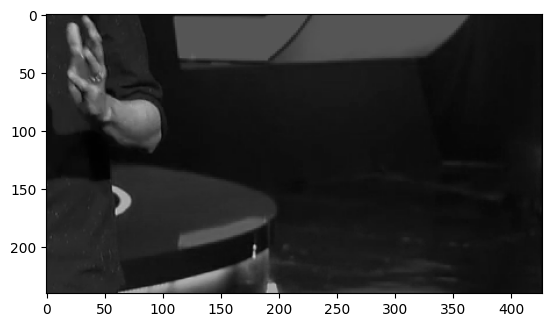

[[[40 40 40]
  [40 40 40]
  [37 37 37]
  ...
  [17 17 17]
  [17 17 17]
  [14 14 14]]

 [[37 37 37]
  [38 38 38]
  [37 37 37]
  ...
  [16 16 16]
  [17 17 17]
  [14 14 14]]

 [[37 37 37]
  [37 37 37]
  [37 37 37]
  ...
  [15 15 15]
  [15 15 15]
  [12 12 12]]

 ...

 [[43 43 43]
  [43 43 43]
  [43 43 43]
  ...
  [21 21 21]
  [20 20 20]
  [14 14 14]]

 [[43 43 43]
  [43 43 43]
  [43 43 43]
  ...
  [22 22 22]
  [21 21 21]
  [14 14 14]]

 [[43 43 43]
  [43 43 43]
  [43 43 43]
  ...
  [22 22 22]
  [22 22 22]
  [16 16 16]]]


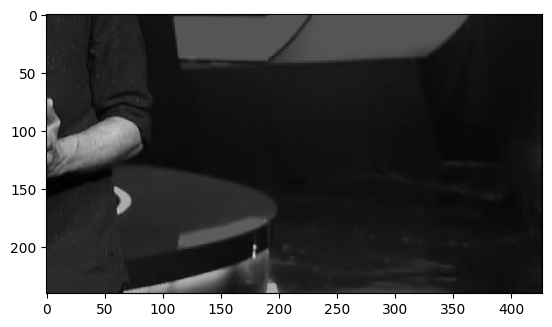

[[[38 38 38]
  [38 38 38]
  [37 37 37]
  ...
  [18 18 18]
  [16 16 16]
  [14 14 14]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [18 18 18]
  [16 16 16]
  [13 13 13]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [18 18 18]
  [16 16 16]
  [12 12 12]]

 ...

 [[42 42 42]
  [43 43 43]
  [43 43 43]
  ...
  [21 21 21]
  [21 21 21]
  [14 14 14]]

 [[42 42 42]
  [43 43 43]
  [43 43 43]
  ...
  [22 22 22]
  [21 21 21]
  [14 14 14]]

 [[42 42 42]
  [43 43 43]
  [43 43 43]
  ...
  [23 23 23]
  [23 23 23]
  [15 15 15]]]


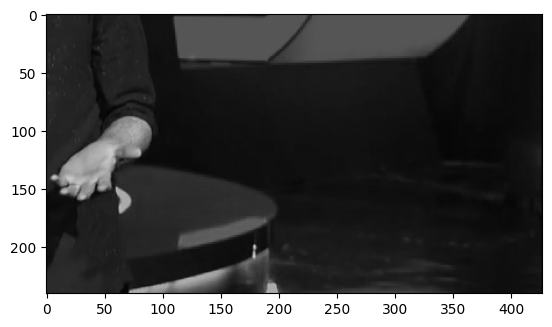

[[[41 41 41]
  [42 42 42]
  [42 42 42]
  ...
  [18 18 18]
  [17 17 17]
  [15 15 15]]

 [[38 38 38]
  [40 40 40]
  [40 40 40]
  ...
  [19 19 19]
  [17 17 17]
  [13 13 13]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [18 18 18]
  [16 16 16]
  [12 12 12]]

 ...

 [[42 42 42]
  [42 42 42]
  [43 43 43]
  ...
  [21 21 21]
  [20 20 20]
  [14 14 14]]

 [[42 42 42]
  [42 42 42]
  [42 42 42]
  ...
  [23 23 23]
  [20 20 20]
  [14 14 14]]

 [[42 42 42]
  [42 42 42]
  [42 42 42]
  ...
  [24 24 24]
  [23 23 23]
  [15 15 15]]]


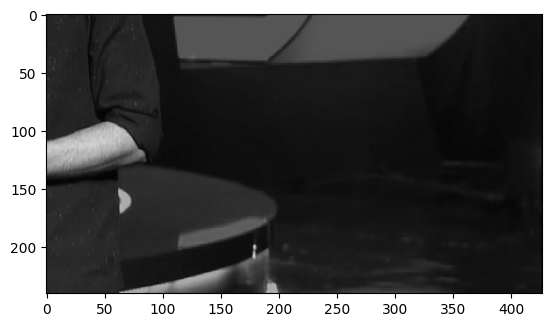

[[[40 40 40]
  [41 41 41]
  [40 40 40]
  ...
  [18 18 18]
  [17 17 17]
  [14 14 14]]

 [[38 38 38]
  [40 40 40]
  [40 40 40]
  ...
  [18 18 18]
  [18 18 18]
  [13 13 13]]

 [[38 38 38]
  [40 40 40]
  [40 40 40]
  ...
  [17 17 17]
  [17 17 17]
  [13 13 13]]

 ...

 [[43 43 43]
  [43 43 43]
  [42 42 42]
  ...
  [20 20 20]
  [20 20 20]
  [13 13 13]]

 [[43 43 43]
  [43 43 43]
  [42 42 42]
  ...
  [22 22 22]
  [20 20 20]
  [13 13 13]]

 [[43 43 43]
  [43 43 43]
  [42 42 42]
  ...
  [24 24 24]
  [22 22 22]
  [15 15 15]]]


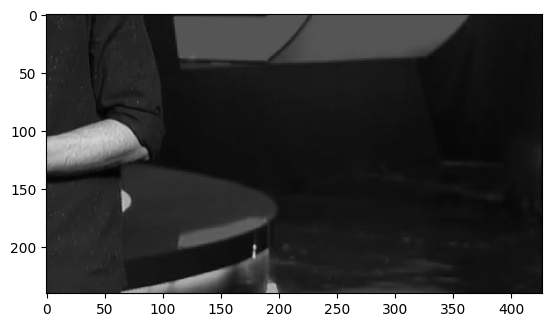

In [8]:
h, w = editor.h, editor.w
frames = editor.get_frame_every_x_seconds(x=1, grid=(h//2, h, w//2, w), blackAndWhite=True)
for i,f in enumerate(frames):
    if i > 9:
        break
    # print(f[1])
    # plot the frame
    plt.imshow(f[1])
    plt.show()